In [ ]:
import cv2
#import numpy as np

# Charger l'image principale et l'image du modèle
img = cv2.imread('20230320_175414_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('20230320_123354_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)

# Définir la taille du bloc pour le bloc-matching
block_size = (50, 50)

# Calculer la taille de la zone de recherche (zone dans l'image principale où nous cherchons des correspondances)
search_size = (img.shape[1] - template.shape[1] + 1, img.shape[0] - template.shape[0] + 1)

# Appliquer le bloc-matching avec la méthode TM_SQDIFF_NORMED
result = cv2.matchTemplate(img, template, cv2.TM_SQDIFF_NORMED)

# Trouver la position du bloc correspondant avec la plus petite différence
min_val, _, min_loc, _ = cv2.minMaxLoc(result)

# Dessiner un rectangle autour de la zone correspondante
top_left = min_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(img, top_left, bottom_right, 255, 2)

# Afficher l'image résultante
cv2.imshow('Block Matching Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to target thread (0x5622ba71bf80)

QObject::moveToThread: Current thread (0x5622ba71bf80) is not the object's thread (0x5622bb37cad0).
Cannot move to tar

In [ ]:
print('Dimensions de l\'image:', img.shape)
print('Dimensions du modèle:', template.shape)

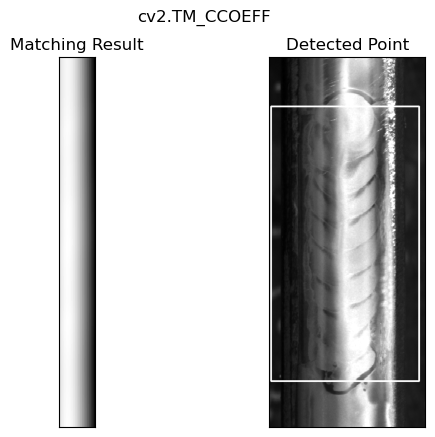

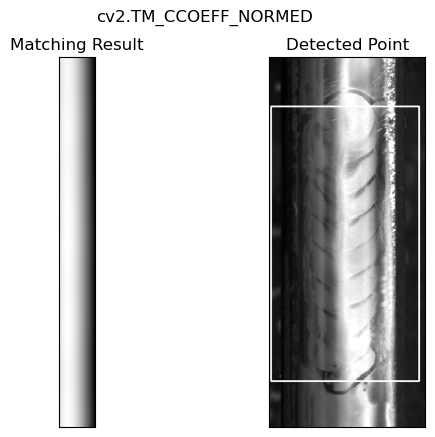

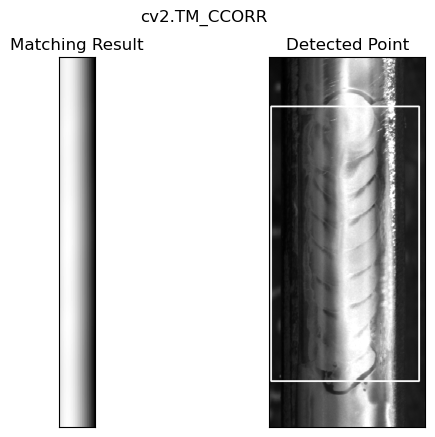

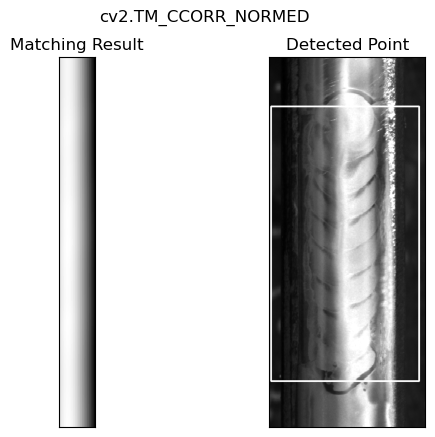

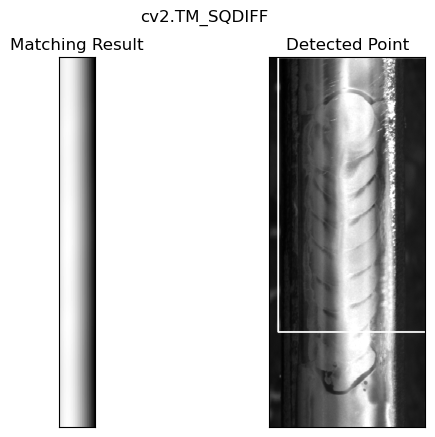

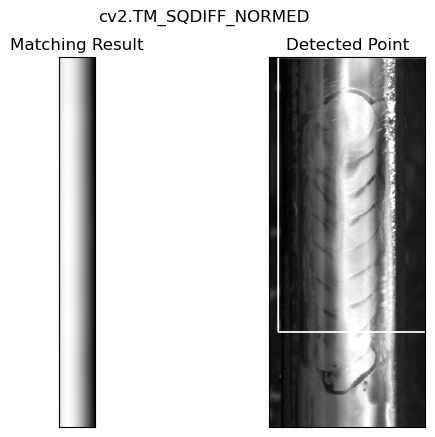

In [1]:
!pip install matplotlib
from matplotlib import pyplot as plt
import cv2
import numpy as np
img = cv2.imread('20230320_175414_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv2.imread('20230320_123354_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
import cv2
import numpy as np

# Charger l'image principale et l'image du modèle
img = cv2.imread('20230320_175414_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('20230320_123354_BRS_R_DN_23.525_00.jpg', cv2.IMREAD_GRAYSCALE)

# Appliquer le bloc-matching avec la méthode TM_CCOEFF_NORMED
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

# Trouver la position du bloc correspondant avec la plus grande corrélation normalisée
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Dessiner un rectangle autour de la zone correspondante
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(img, top_left, bottom_right, 255, 2)

# Afficher l'image résultante
cv2.imshow('Block Matching Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to target thread (0x55d65a2f76f0)

QObject::moveToThread: Current thread (0x55d65a2f76f0) is not the object's thread (0x55d65ad60bd0).
Cannot move to tar